In [1]:
# Install and load the readxl package
install.packages("readxl")
library(readxl)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



# Exercício de treinamento 1.1

**Questions**

Dataset TrainExer11 contains survey outcomes of a travel agency that wishes to improve recommendation strategies
for its clients. The dataset contains 26 observations on age and average daily expenditures during holidays.

In [ ]:
# Read the Excel file
data <- read_excel("TrainExer11.xls")
data

Observation,Age,Expenditures
<dbl>,<dbl>,<dbl>
1,49,95
2,15,104
3,43,91
4,45,98
5,40,94
6,35,107
7,42,96
8,38,108
9,46,98




**(a)** Make two histograms, one of expenditures and the other of age. Make also a scatter diagram with expenditures on the vertical axis versus age on the horizontal axis.

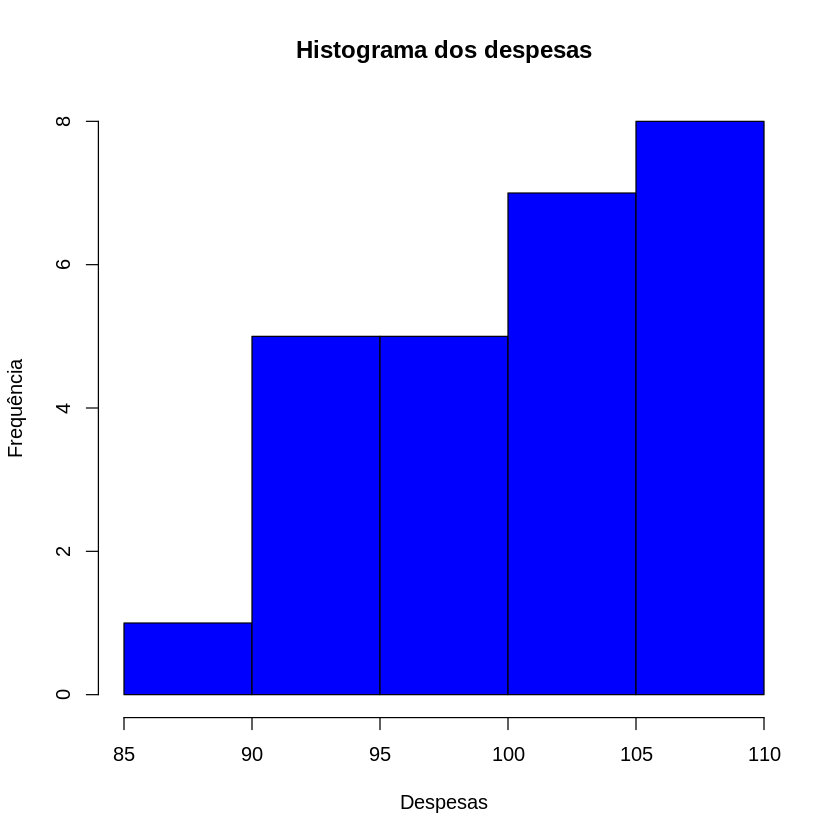

In [ ]:
# Gerando um histograma para despesas
hist(data$Expenditures,
     main = "Histograma dos despesas",
     xlab = "Despesas",
     ylab = "Frequência",
     col = "blue")

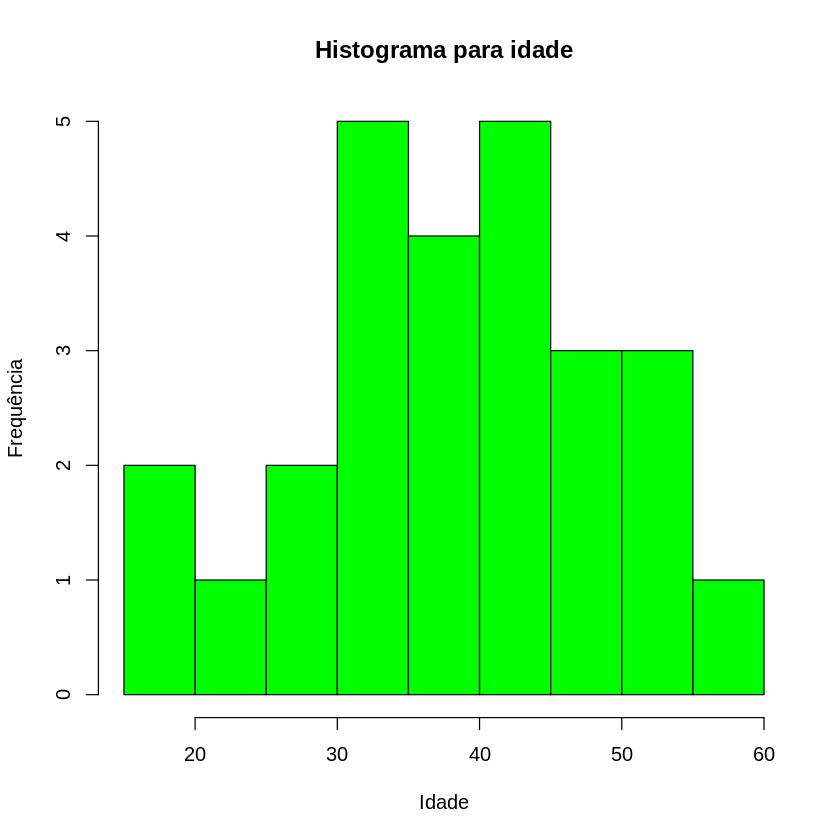

In [ ]:
# Gerando um histograma para a variável idade
hist(data$Age,
     main = "Histograma para idade",
     xlab = "Idade",
     ylab = "Frequência",
     col = "green")

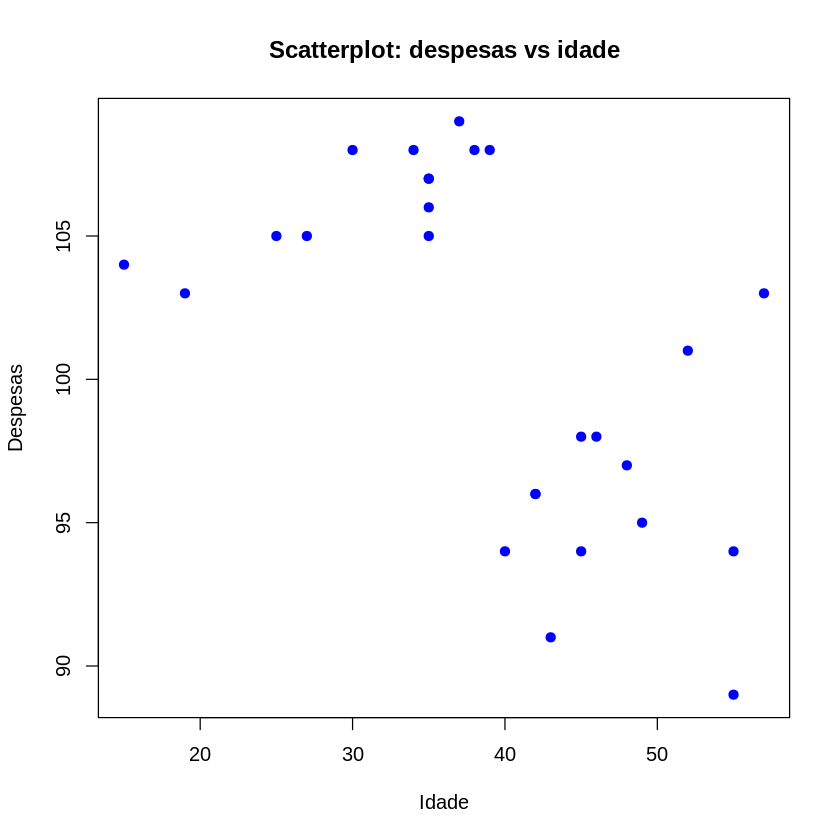

In [ ]:
# Scatterplot despesas vs idade
# Scatter plot: Expenditures (Y) vs Age (X)
plot(data$Age, data$Expenditures,
     main = "Scatterplot: despesas vs idade",
     xlab = "Idade",
     ylab = "Despesas",
     pch = 19,       # Solid circle points
     col = "blue")   # Blue points

**(b)** In what respect do the data in this scatter diagram look different from the case of the sales and price data discussed in the lecture?

The data here does not show a linear pattern, it actually shows two patterns in the data.

**(c)** Propose a method to analyze these data in a way that assists the travel agent in making recommendations to future clients.


Call:
lm(formula = Expenditures ~ Age, data = group1)

Residuals:
    Min      1Q  Median      3Q     Max 
-2.1613 -0.5775 -0.1613  0.7982  1.8286 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 100.23228    1.41590   70.79 5.55e-16 ***
Age           0.19797    0.04438    4.46 0.000962 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.153 on 11 degrees of freedom
Multiple R-squared:  0.644,	Adjusted R-squared:  0.6116 
F-statistic:  19.9 on 1 and 11 DF,  p-value: 0.0009619


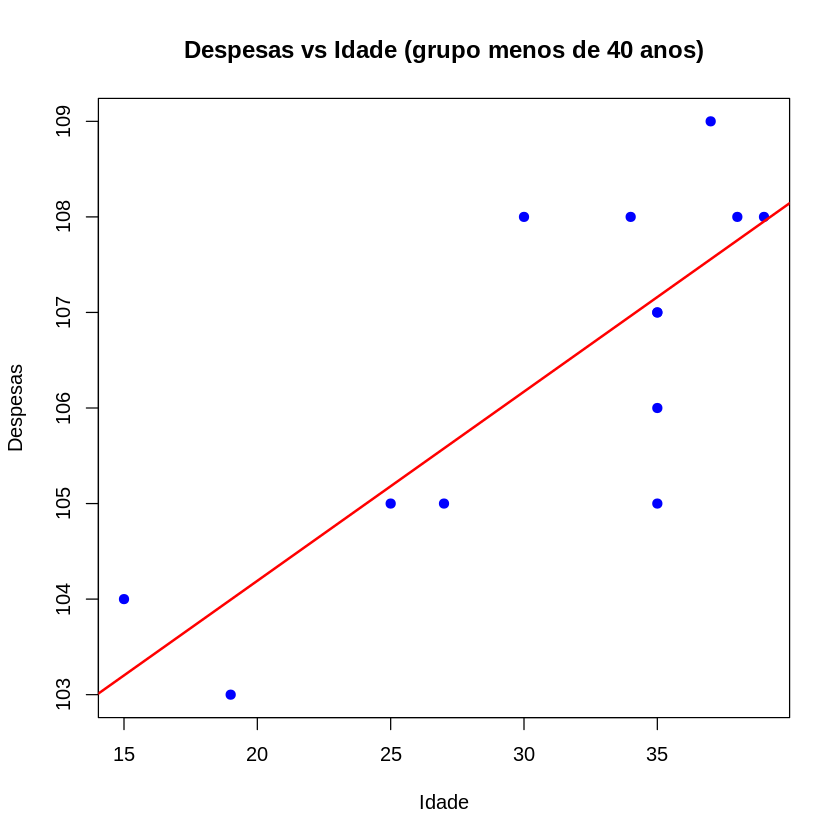

In [ ]:
# Subset data for Age <= 39
group1 <- subset(data, Age <= 39)

# Fit the regression model for group 1
model1 <- lm(Expenditures ~ Age, data = group1)

# Summarize the model for group 1
summary(model1)

# Plot for group 1
plot(group1$Age, group1$Expenditures,
     main = "Despesas vs Idade (grupo menos de 40 anos)",
     xlab = "Idade",
     ylab = "Despesas",
     pch = 19, col = "blue")

# Add regression line for group 1
abline(model1, col = "red", lwd = 2)


Call:
lm(formula = Expenditures ~ Age, data = group2)

Residuals:
    Min      1Q  Median      3Q     Max 
-7.9278 -1.4631  0.9763  2.3905  5.7793 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  88.8719     9.4585   9.396 1.37e-06 ***
Age           0.1465     0.1974   0.742    0.474    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 3.833 on 11 degrees of freedom
Multiple R-squared:  0.04767,	Adjusted R-squared:  -0.0389 
F-statistic: 0.5507 on 1 and 11 DF,  p-value: 0.4736


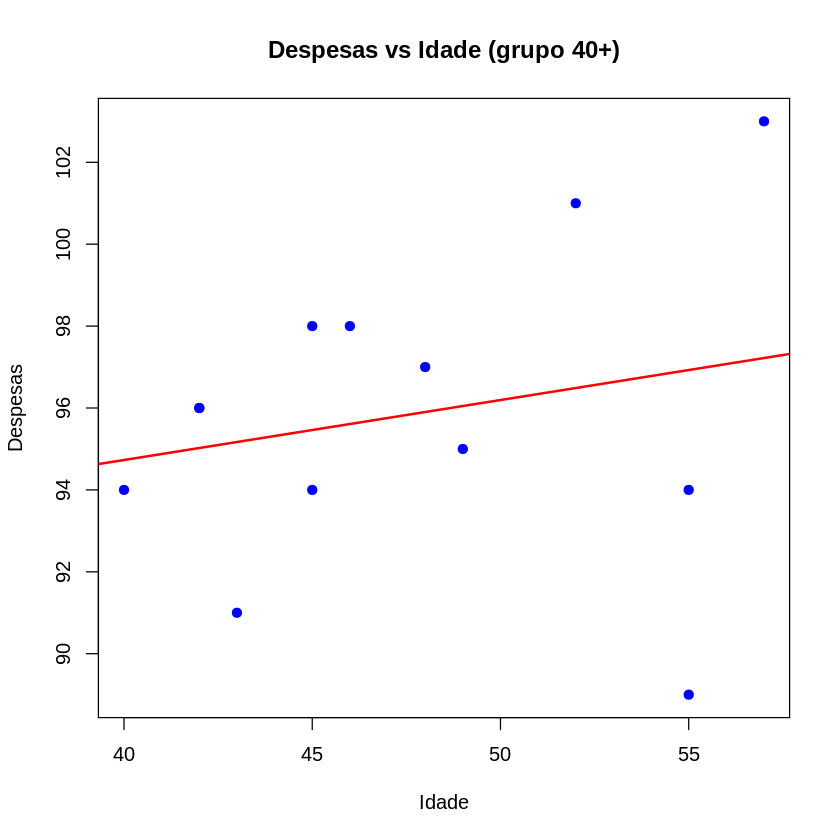

In [ ]:
# Subset data for Age 40+
group2 <- subset(data, Age > 39)

# Fit the regression model for group 2
model2 <- lm(Expenditures ~ Age, data = group2)

# Summarize the model for group 2
summary(model2)

# Plot for group 2
plot(group2$Age, group2$Expenditures,
     main = "Despesas vs Idade (grupo 40+)",
     xlab = "Idade",
     ylab = "Despesas",
     pch = 19, col = "blue")

# Add regression line for group 2
abline(model2, col = "red", lwd = 2)

The scatter diagram indicates two groups of clients. Younger clients spend more than older ones. Further, expenditures tend to increase with age for younger clients, whereas the pattern is less clear for older clients.

**(d)** Compute the sample mean of expenditures of all 26 clients.

In [ ]:
# Compute the sample mean of expenditures
mean_expenditures <- mean(data$Expenditures, na.rm = TRUE)

# Print the result
cat('Média:',mean_expenditures)

Média: 101.1154

**(e)** Compute two sample means of expenditures, one for clients of age forty or more and the other for clients of age below forty.

In [ ]:
# Compute the sample mean of expenditures
mean_expenditures <- mean(group1$Expenditures, na.rm = TRUE)

# Print the result
cat('Média grupo 1:', mean_expenditures)

Média: 106.3846

In [ ]:
# Compute the sample mean of expenditures
mean_expenditures <- mean(group2$Expenditures, na.rm = TRUE)

# Print the result
cat('Média grupo 2:',mean_expenditures)

Média grupo 2: 95.84615

**(f)** What daily expenditures would you predict for a new client of fifty years old? And for someone who is twenty-five years old?

In [ ]:
# Predict expenditures for a 50-year-old client (Age > 39)
age_50 <- 50
expenditure_50 <- predict(model2, newdata = data.frame(Age = age_50))

# Predict expenditures for a 25-year-old client (Age <= 39)
age_25 <- 25
expenditure_25 <- predict(model1, newdata = data.frame(Age = age_25))

# Print the results
cat("Despesas preditas para cliente de 50 anos:", expenditure_50, "\n")
cat("Despesas preditas para cliente de 25 anos:", expenditure_25)

Despesas preditas para cliente de 50 anos: 96.19543 
Despesas preditas para cliente de 25 anos: 105.1816

# Exercício de treinamento 1.3

**Questions**

Dataset TrainExer13 contains the winning times (W) of the Olympic 100-meter finals (for men) from 1948 to 2004.The calendar years 1948-2004 are transformed to games (G) 1-15 to simplify computations. A simple regression
 model for the trend in winning times is Wi = α + βGi + i.

In [7]:
# Read the Excel file
data <- read_excel("TrainExer13.xls")

# Rename the columns to W and G
colnames(data) <- c("G", "Year", "W")

# Inspect the dataset
data

G,Year,W
<dbl>,<dbl>,<dbl>
1,1948,10.30
2,1952,10.40
3,1956,10.50
4,1960,10.20
5,1964,10.00
6,1968,9.95
7,1972,10.14
8,1976,10.06
9,1980,10.25


**(a)** Compute a and b, and determine the values of R2 and s.

In [8]:
# Fit the regression model
model <- lm(W ~ G, data = data)

# Display the model summary
summary(model)


Call:
lm(formula = W ~ G, data = data)

Residuals:
   Min     1Q Median     3Q    Max 
-0.208 -0.048 -0.016  0.032  0.228 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 10.38600    0.06674 155.623  < 2e-16 ***
G           -0.03800    0.00734  -5.177 0.000178 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.1228 on 13 degrees of freedom
Multiple R-squared:  0.6734,	Adjusted R-squared:  0.6482 
F-statistic:  26.8 on 1 and 13 DF,  p-value: 0.0001781


So, we have a = 10.386, b = -0.038, s = 0.1228 and R2 = 0.6734.

**(b)** Are you confident on the predictive ability of this model? Motivate your answer.

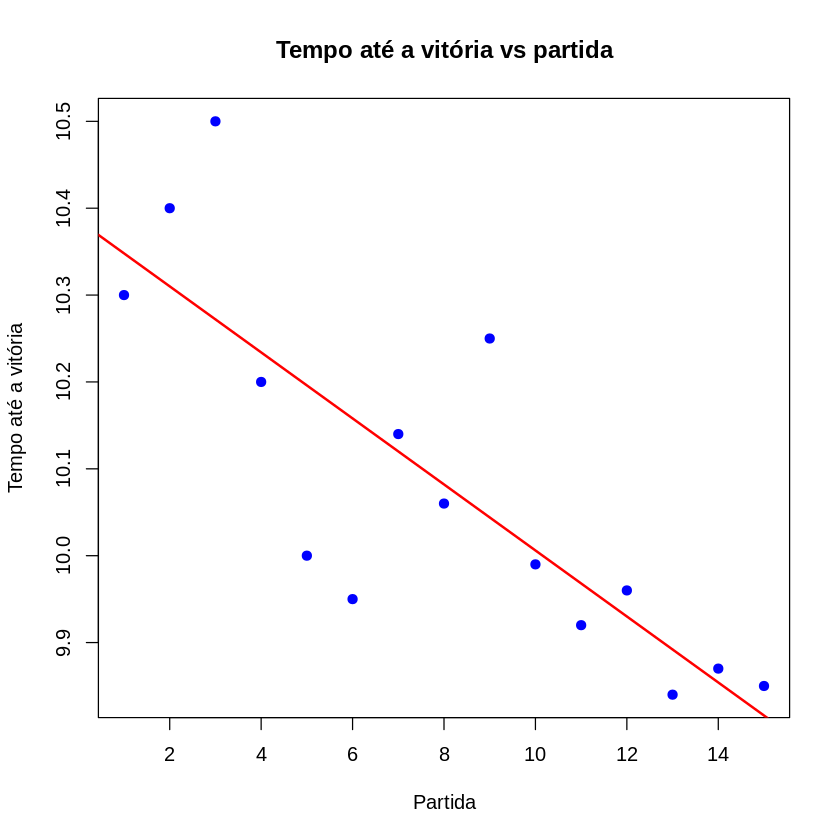

In [12]:
# Plot for graphic
plot(data$G, data$W,
     main = "Tempo até a vitória vs partida",
     xlab = "Partida",
     ylab = "Tempo até a vitória",
     pch = 19, col = "blue")

# Add regression line
abline(model, col = "red", lwd = 2)

Not so much, especially considering the variance around the straight line, with reazonably sparse datapoints.

**(c)** What prediction do you get for 2008, 2012, and 2016? Compare your predictions with the actual winning times

In [21]:
# Define game numbers for predictions
new_games <- data.frame(Year = c(2008, 2012, 2016),
                        G = c(16, 17, 18))

# Predict winning times for 2008, 2012, and 2016
new_games$Predicted_W <- round(predict(model, newdata = new_games), 2)

# Display the predictions as a table
print(new_games)

  Year  G Predicted_W
1 2008 16        9.78
2 2012 17        9.74
3 2016 18        9.70


These are reasonable predictions, as we've seen a decrease in winning times over the years and expect this trend to continue.

# Exercício de treinamento 1.5

**Questions**

In Lecture 1.5, we applied simple regression for data on winning times on the Olympic 100 meter (athletics). We computed the regression coefficients a and b for two trend models, one with a linear trend and one with a nonlinear trend. In a test question, you created forecasts of the winning times for both men and women in 2008 and 2012.Of course, you can also forecast further ahead in the future. In fact, it is even possible to predict when men and
 women would run equally fast, if the current trends persist.

In [4]:
# Read the Excel file
data <- read_excel("TrainExer15.xls")

# Rename the columns to W and G
colnames(data) <- c("G", "Year", "WM", "WW")

# Inspect the dataset
data

G,Year,WM,WW
<dbl>,<dbl>,<dbl>,<dbl>
1,1948,10.30,11.90
2,1952,10.40,11.50
3,1956,10.50,11.50
4,1960,10.20,11.00
5,1964,10.00,11.40
6,1968,9.95,11.08
7,1972,10.14,11.07
8,1976,10.06,11.08
9,1980,10.25,11.06


**(a)** Show that the linear trend model predicts equal winning times at around 2140.

In [5]:
# Fit the regression model for men
model1 <- lm(WM ~ G, data = data)

# Display the model summary
summary(model1)


Call:
lm(formula = WM ~ G, data = data)

Residuals:
   Min     1Q Median     3Q    Max 
-0.208 -0.048 -0.016  0.032  0.228 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 10.38600    0.06674 155.623  < 2e-16 ***
G           -0.03800    0.00734  -5.177 0.000178 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.1228 on 13 degrees of freedom
Multiple R-squared:  0.6734,	Adjusted R-squared:  0.6482 
F-statistic:  26.8 on 1 and 13 DF,  p-value: 0.0001781


In [6]:
# Fit the regression model for women
model2 <- lm(WW ~ G, data = data)

# Display the model summary
summary(model2)


Call:
lm(formula = WW ~ G, data = data)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.37388 -0.06327  0.01976  0.09562  0.35683 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 11.60610    0.11077 104.775  < 2e-16 ***
G           -0.06293    0.01218  -5.165 0.000182 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.2039 on 13 degrees of freedom
Multiple R-squared:  0.6724,	Adjusted R-squared:  0.6472 
F-statistic: 26.68 on 1 and 13 DF,  p-value: 0.0001818


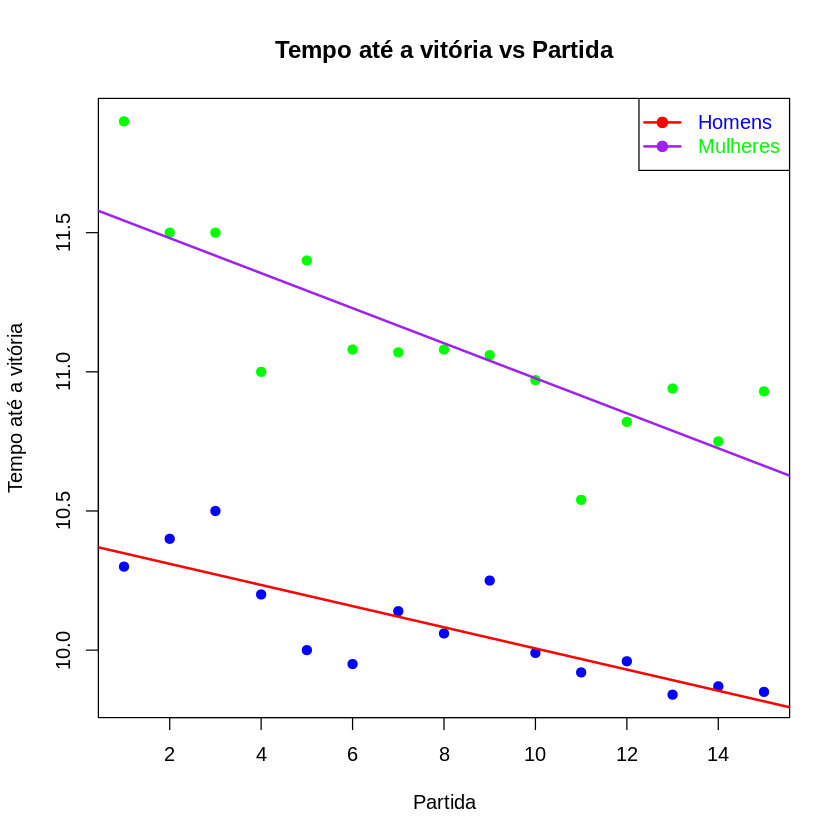

In [18]:
# Plot the first set of data points (WM)
plot(data$G, data$WM,
     main = "Tempo até a vitória vs Partida",
     xlab = "Partida",
     ylab = "Tempo até a vitória",
     pch = 19, col = "blue",
     xlim = range(data$G), ylim = range(c(data$WM, data$WW))) # Adjust plot limits

# Add the second set of data points (WW)
points(data$G, data$WW, pch = 19, col = "green")

# Add the first regression line
abline(model1, col = "red", lwd = 2)

# Add the second regression line
abline(model2, col = "purple", lwd = 2)

# Add a legend to distinguish the models
legend("topright", legend = c("Homens", "Mulheres"),
       col = c("red", "purple"), lty = 1, lwd = 2, pch = 19,
       text.col = c("blue", "green"))

In [36]:
# Define game numbers for predictions
new_games <- data.frame(Year = c(2140),
                        G = c(49))

# Predict winning times for 2140
new_games$Predicted_WM <- round(predict(model1, newdata = new_games), 2)
new_games$Predicted_WW <- round(predict(model2, newdata = new_games), 2)

# Display the predictions as a table
print(new_games)

  Year  G Predicted_WM Predicted_WW
1 2140 49         8.52         8.52


**(b)** Show that the nonlinear trend model predicts equal winning times at around 2192.

In [19]:
# Create log-transformed variables
data$log_WM <- log(data$WM)
data$log_WW <- log(data$WW)

In [20]:
# Fit the regression model for men
model3 <- lm(log_WM ~ G, data = data)

# Display the model summary
summary(model3)


Call:
lm(formula = log_WM ~ G, data = data)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.020496 -0.004720 -0.001460  0.003126  0.022039 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)  2.340604   0.006546 357.560  < 2e-16 ***
G           -0.003756   0.000720  -5.217 0.000166 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.01205 on 13 degrees of freedom
Multiple R-squared:  0.6767,	Adjusted R-squared:  0.6519 
F-statistic: 27.22 on 1 and 13 DF,  p-value: 0.0001662


In [21]:
# Fit the regression model for women
model4 <- lm(log_WW ~ G, data = data)

# Display the model summary
summary(model4)


Call:
lm(formula = log_WW ~ G, data = data)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.034729 -0.005508  0.001838  0.008783  0.030503 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)  2.451648   0.009876 248.238  < 2e-16 ***
G           -0.005613   0.001086  -5.167 0.000181 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.01818 on 13 degrees of freedom
Multiple R-squared:  0.6725,	Adjusted R-squared:  0.6474 
F-statistic:  26.7 on 1 and 13 DF,  p-value: 0.0001811


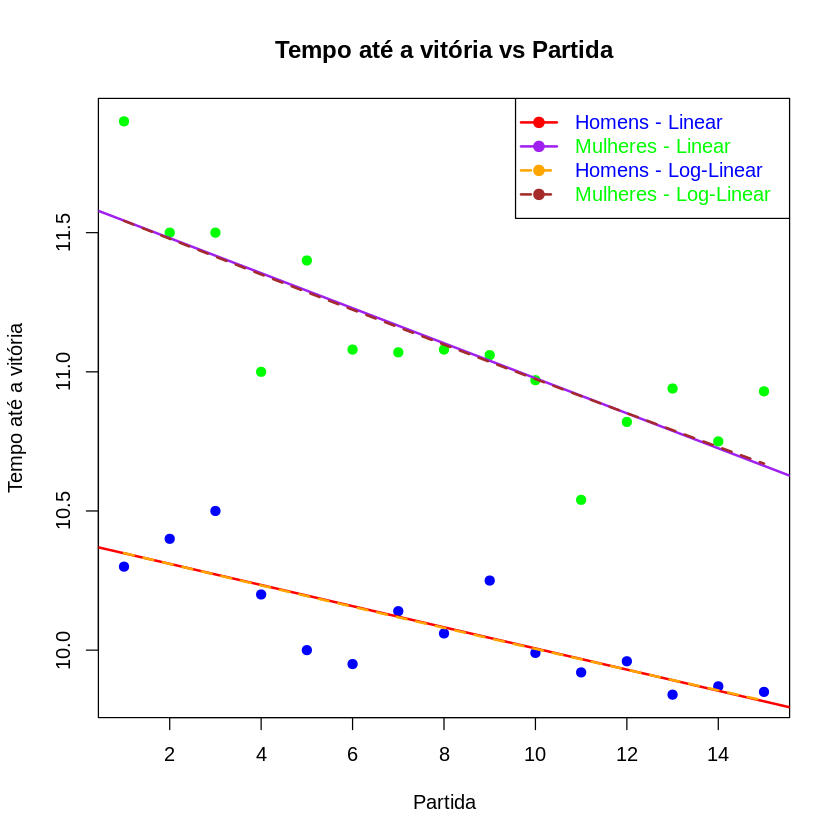

In [23]:
# Retransform predictions for log-linear models
data$predicted_WM_log <- exp(predict(model3, newdata = data))
data$predicted_WW_log <- exp(predict(model4, newdata = data))

# Plot the first set of data points (WM)
plot(data$G, data$WM,
     main = "Tempo até a vitória vs Partida",
     xlab = "Partida",
     ylab = "Tempo até a vitória",
     pch = 19, col = "blue",
     xlim = range(data$G), ylim = range(c(data$WM, data$WW))) # Adjust plot limits

# Add the second set of data points (WW)
points(data$G, data$WW, pch = 19, col = "green")

# Add the original regression lines
abline(model1, col = "red", lwd = 2)
abline(model2, col = "purple", lwd = 2)

# Add re-transformed regression lines (log-linear models)
lines(data$G, data$predicted_WM_log, col = "orange", lwd = 2, lty = 2)
lines(data$G, data$predicted_WW_log, col = "brown", lwd = 2, lty = 2)

# Add a legend to distinguish the models
legend("topright", legend = c("Homens - Linear", "Mulheres - Linear",
                              "Homens - Log-Linear", "Mulheres - Log-Linear"),
       col = c("red", "purple", "orange", "brown"),
       lty = c(1, 1, 2, 2), lwd = 2, pch = 19,
       text.col = c("blue", "green"))

In [34]:
# Define game numbers for predictions
new_games <- data.frame(Year = c(2184),
                        G = c(60))

# Predict winning times for 2140 using log-linear models
new_games$Predicted_WM <- round(exp(predict(model4, newdata = new_games)), 2)
new_games$Predicted_WW <- round(exp(predict(model3, newdata = new_games)), 2)

# Display the predictions as a table
print(new_games)

  Year  G Predicted_WM Predicted_WW
1 2184 60         8.29         8.29
